In [102]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [103]:
train_orig=pd.read_csv("train.csv")
test_nolabel=pd.read_csv("test.csv")

In [104]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
stop_words = set(stopwords.words('english'))

train = train_orig

def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    return " ".join(filtered_sentence)

def preprocess(line):
    line = line.lower()  #convert to lowercase
    line = re.sub(r'\d+', '', line)  #remove numbers
    line = line.translate(line.maketrans("","", string.punctuation))  #remove punctuation
#     line = line.translate(None, string.punctuation)  #remove punctuation
    line = remove_stopwords(line)
    return line
for i,line in enumerate(train.tweet):
    train.tweet[i] = preprocess(line)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-104-4ccb4ea9095c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.tweet[i] = preprocess(line)


In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train['tweet'], train['label'], test_size=0.5, stratify=train['label'])

trainp=train[train.label==1]
trainn=train[train.label==0]
print(trainp.info())
trainn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242 entries, 13 to 31960
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2242 non-null   int64 
 1   label   2242 non-null   int64 
 2   tweet   2242 non-null   object
dtypes: int64(2), object(1)
memory usage: 70.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29720 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      29720 non-null  int64 
 1   label   29720 non-null  int64 
 2   tweet   29720 non-null  object
dtypes: int64(2), object(1)
memory usage: 928.8+ KB


In [106]:
# Let us balance the dataset
train_imbalanced = train
from sklearn.utils import resample
df_majority = train[train.label==0]
df_minority = train[train.label==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print("Before")
print(train.label.value_counts())
print("After")
print(df_upsampled.label.value_counts())

X_train, X_test, y_train, y_test = train_test_split(df_upsampled['tweet'], df_upsampled['label'], test_size=0.5, stratify=df_upsampled['label'])

Before
0    29720
1     2242
Name: label, dtype: int64
After
1    29720
0    29720
Name: label, dtype: int64


In [107]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
# Xtext=train.tweet
# Xtest=test.tweet
# y=train.label
# test
# ytest=test.label

**Convert text data to numerical data**

In [108]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()
tf_train=vect.fit_transform(X_train)  #train the vectorizer, build the vocablury
tf_test=vect.transform(X_test)  #get same encodings on test data as of vocabulary built

In [109]:
tf_test_nolabel=vect.transform(test_nolabel.tweet)

In [110]:
# print(tf_train)
# vect.get_feature_names()[:10] #print few features only to avoid slowing down the notebook

In [111]:
model.fit(X=tf_train,y=y_train)

MultinomialNB()

In [112]:
expected = y_test
predicted=model.predict(tf_test)

In [113]:
from sklearn import metrics

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95     14860
           1       0.92      0.98      0.95     14860

    accuracy                           0.95     29720
   macro avg       0.95      0.95      0.95     29720
weighted avg       0.95      0.95      0.95     29720

[[13569  1291]
 [  245 14615]]


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x222bdc88070>)

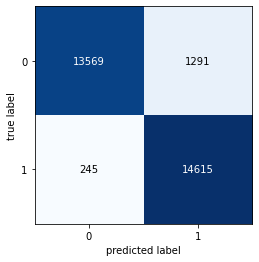

In [114]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))

In [115]:
print(trainp.iloc[:10])
trainn.iloc[:10]

      id  label                                              tweet
13    14      1  user cnn calls michigan middle school build wa...
14    15      1  comment australia opkillingbay seashepherd hel...
17    18      1                                      retweet agree
23    24      1                   user user lumpy says prove lumpy
34    35      1  unbelievable st century wed need something lik...
56    57      1                         user lets fight love peace
68    69      1  ð©the white establishment cant blk folx runn...
77    78      1  user hey white people call people white user r...
82    83      1  altright uses amp insecurity lure men whitesup...
111  112      1  user im interested linguistics doesnt address ...


,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time urð± ðððð...
4,5,0,factsguide society motivation
5,6,0,huge fan fare big talking leave chaos pay disp...
6,7,0,user camping tomorrow user user user user user...
7,8,0,next school year year examsð¯ cant think ð...
8,9,0,love land allin cavs champions cleveland cleve...
9,10,0,user user welcome im gr


In [116]:
gg=X_test.reset_index(drop=True)
# print(gg)
for i, p in enumerate(predicted):
#     print(i)
    print (gg[i] + " - " + str(p))
    if i>5:
        break #to avoid a lot of printing and slowing down the notebook

seems escaped attention bashing whites isnt winning elections dem seats lost â¦ - 1
ourlander killed angus nooooooo sweet loveable angus howwillrupecopewithouthiswingman user - 0
live country many think first lady less vulgar black first lady trumpâ¦ - 1
altright promote new kind genetics mt user - 1
blacklivesmatter thats bilal called adhan kaaba always existed hamza yusuf nice ð - 1
user love trucks skating forever noticed today ahh bent trucks ð - 0
user song jojoba sing song videos videoclip alone shooting single fashionâ¦ - 0


In [117]:
predicted_nolabel=model.predict(tf_test_nolabel)
for i, p in enumerate(tf_test_nolabel):
#     print(i)
    print (test_nolabel.tweet[i] + " - " + str(predicted_nolabel[i]))
    if i>5:
        break #to avoid a lot of printing and slowing down the notebook

#studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterialsâ¦  - 0
 @user #white #supremacists want everyone to see the new â  #birdsâ #movie â and hereâs why   - 1
safe ways to heal your #acne!!    #altwaystoheal #healthy   #healing!!  - 0
is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð   #harrypotter #pottermore #favorite - 0
  3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦  - 0
choose to be   :) #momtips  - 0
something inside me dies ð¦ð¿â¨  eyes ness #smokeyeyes #tired  #lonely #sof #grungeâ¦  - 0


In [118]:
test_custom=pd.DataFrame(["Honesty is the best Policy", "Black Lives Matter", "I'm not feeling Well"])
tf_custom = vect.transform(test_custom[0])
model.predict(tf_custom)

array([1, 1, 0], dtype=int64)